We first import necessary modules and instantiate required objects.

In [2]:
from kaa.reach import ReachSet
from kaa.plotutil import Plot
from models.sir import SIR_UnitBox, SIR
from models.rossler import Rossler, Rossler_UnitBox
from models.lotkavolterra import LotkaVolterra, LotkaVolterra_UnitBox
from models.quadcopter import Quadcopter, Quadcopter_UnitBox
from models.phos import Phosphorelay, Phosphorelay_UnitBox
from models.oscpart import OscPart

from kaa.temp.pca_strat import PCAStrat
from kaa.temp.lin_app_strat import LinStrat
from kaa.bundle import BundleMode
from kaa.settings import PlotSettings
from kaa.timer import Timer


PlotSettings.save_fig = False #Enable interactive mode


# SIR 

We test the PCA and Local Linear Approximation Strategies for the SIR models.  

In [2]:
SIR_NUM_STEPS = 300 #Number of steps to run the computation.SIR_

sir_unit = SIR_UnitBox() #Utilizes just the box template containing the initial set.
sir = SIR()

sir_reach = ReachSet(sir)
sir_unit_reach = ReachSet(sir_unit)

sir_flow = sir_reach.computeReachSet(SIR_NUM_STEPS) #Run Sapo's static template computation.
Timer.generate_stats()

Average Generator Procedure Duration: 0.002439464463127984 sec
Average Functional Composition Duration: 0.009508156776428222 sec
Average Bound Computation Duration: 0.0003856676596182364 sec
Average Reachable Set Computation Duration: 0.10230990250905354 sec



We compute the reachable set by setting some required parameters for the alternative strategies.


## SIR PCA Strategy

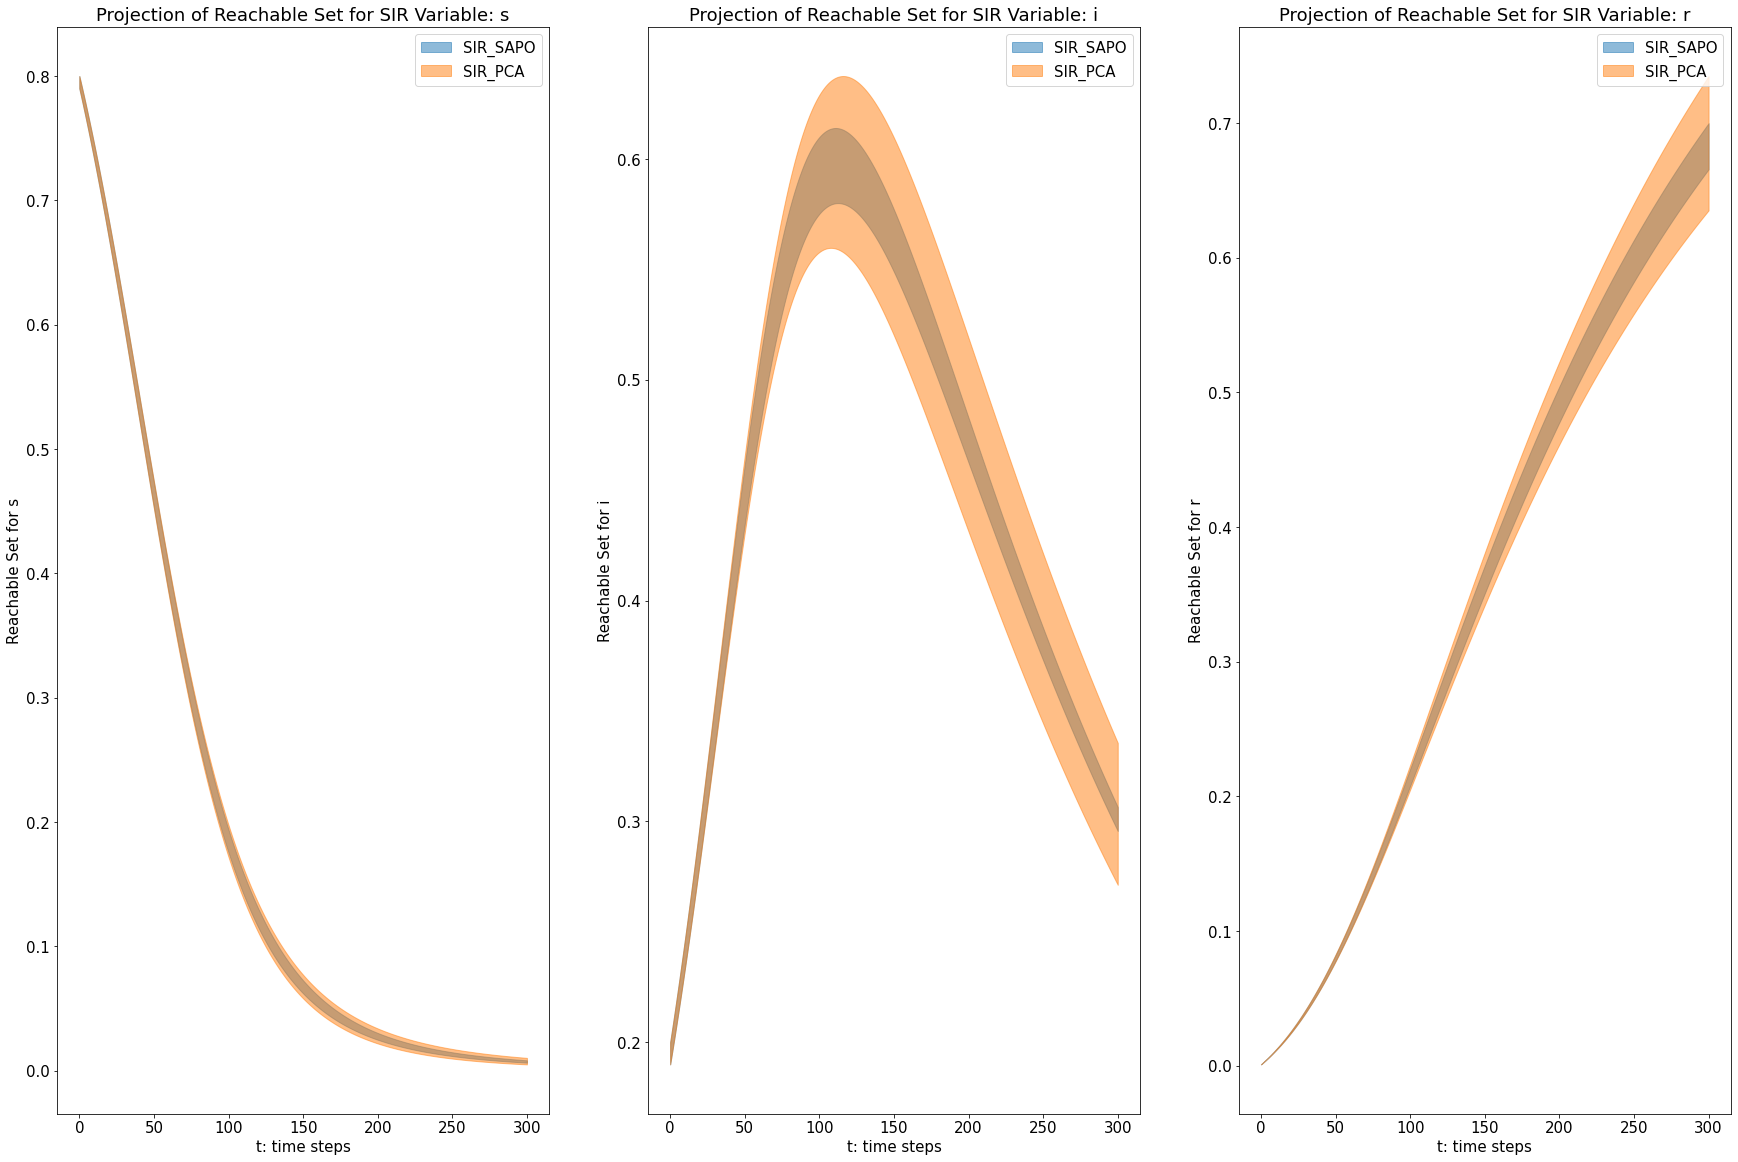

Average Generator Procedure Duration: 0.003312374750773112 sec
Average Functional Composition Duration: 0.011656427065531412 sec
Average Bound Computation Duration: 0.000558608267042372 sec
Average Reachable Set Computation Duration: 0.9843452799320221 sec
Average Proj Duration: 0.10782647132873535 sec


In [3]:
SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.

'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(sir_unit, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
sir_pca_flow = sir_unit_reach.computeReachSet(SIR_NUM_STEPS, tempstrat=pca_strat)

sir_pca_plot = Plot()
sir_pca_plot.add(sir_flow, "SIR_SAPO") #Add Sapo's flowpipe first.
sir_pca_plot.add(sir_pca_flow, "SIR_PCA") #Add our PCA flowipe next.

sir_pca_plot.plot(0,1,2) #Plot projection on all variables.
Timer.generate_stats()


## SIR Linear Approximation Strategy

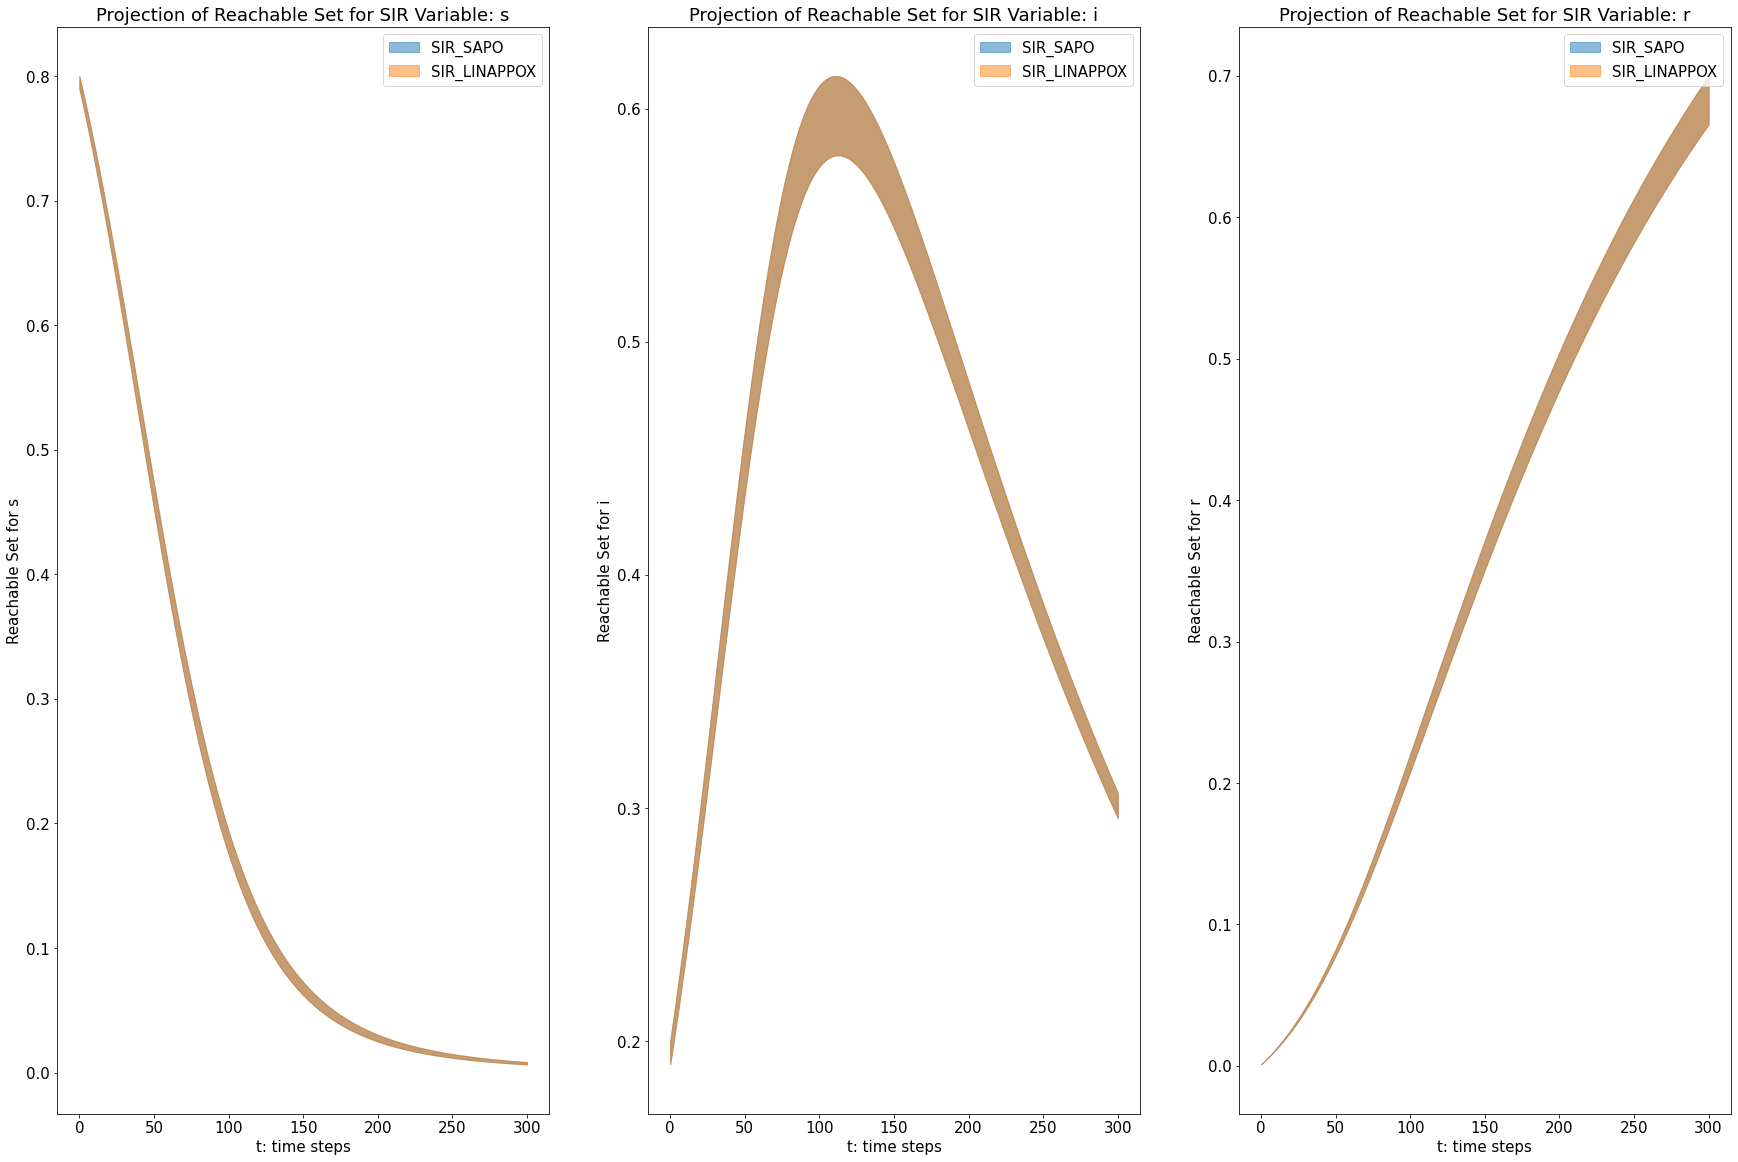

Average Generator Procedure Duration: 0.003430630542613842 sec
Average Functional Composition Duration: 0.012132337005050094 sec
Average Bound Computation Duration: 0.0005843146053361305 sec
Average Reachable Set Computation Duration: 0.7842827465799119 sec
Average Proj Duration: 0.10733983914057414 sec


In [4]:
'Lin Strategy Parameters'
SIR_LIN_ITER_STEPS = 5 #Number of steps between each recomputation of LinApprox Templates.

lin_strat = LinStrat(sir_unit, iter_steps=SIR_LIN_ITER_STEPS)
sir_lin_flow = sir_reach.computeReachSet(SIR_NUM_STEPS, tempstrat=lin_strat) #Run Sapo's static template computation.

sir_lin_plot = Plot()
sir_lin_plot.add(sir_flow, "SIR_SAPO") #Add Sapo's flowpipe first.
sir_lin_plot.add(sir_lin_flow, "SIR_LINAPPOX") #Add our LinApprox flowipe next.

sir_lin_plot.plot(0,1,2)
Timer.generate_stats()


You can try this experiment with different values of the each strategy's parameters by rerunning the respective cell.  However if you wish to choose a different time horizon (other than 300 steps), make sure to re-run all cells starting from the first one after the SIR header.

# Rossler

We test the PCA and Local Linear Approximation Strategies for the Rossler models.  

In [2]:
ROSS_NUM_STEPS = 150 #Number of steps to run the computation.SIR_

ross_unit = Rossler_UnitBox()
ross = Rossler()

ross_reach = ReachSet(ross)
ross_unit_reach = ReachSet(ross_unit)

ross_flow = ross_reach.computeReachSet(ROSS_NUM_STEPS) #Run LinApprox Strat.
Timer.generate_stats()

Average Generator Procedure Duration: 0.0022526290681627063 sec
Average Functional Composition Duration: 0.01079844315846761 sec
Average Bound Computation Duration: 0.00028801953351056134 sec
Average Reachable Set Computation Duration: 0.10071444193522136 sec



We compute the reachable set by setting some required parameters for the alternative strategies.


## Ross PCA Strategy

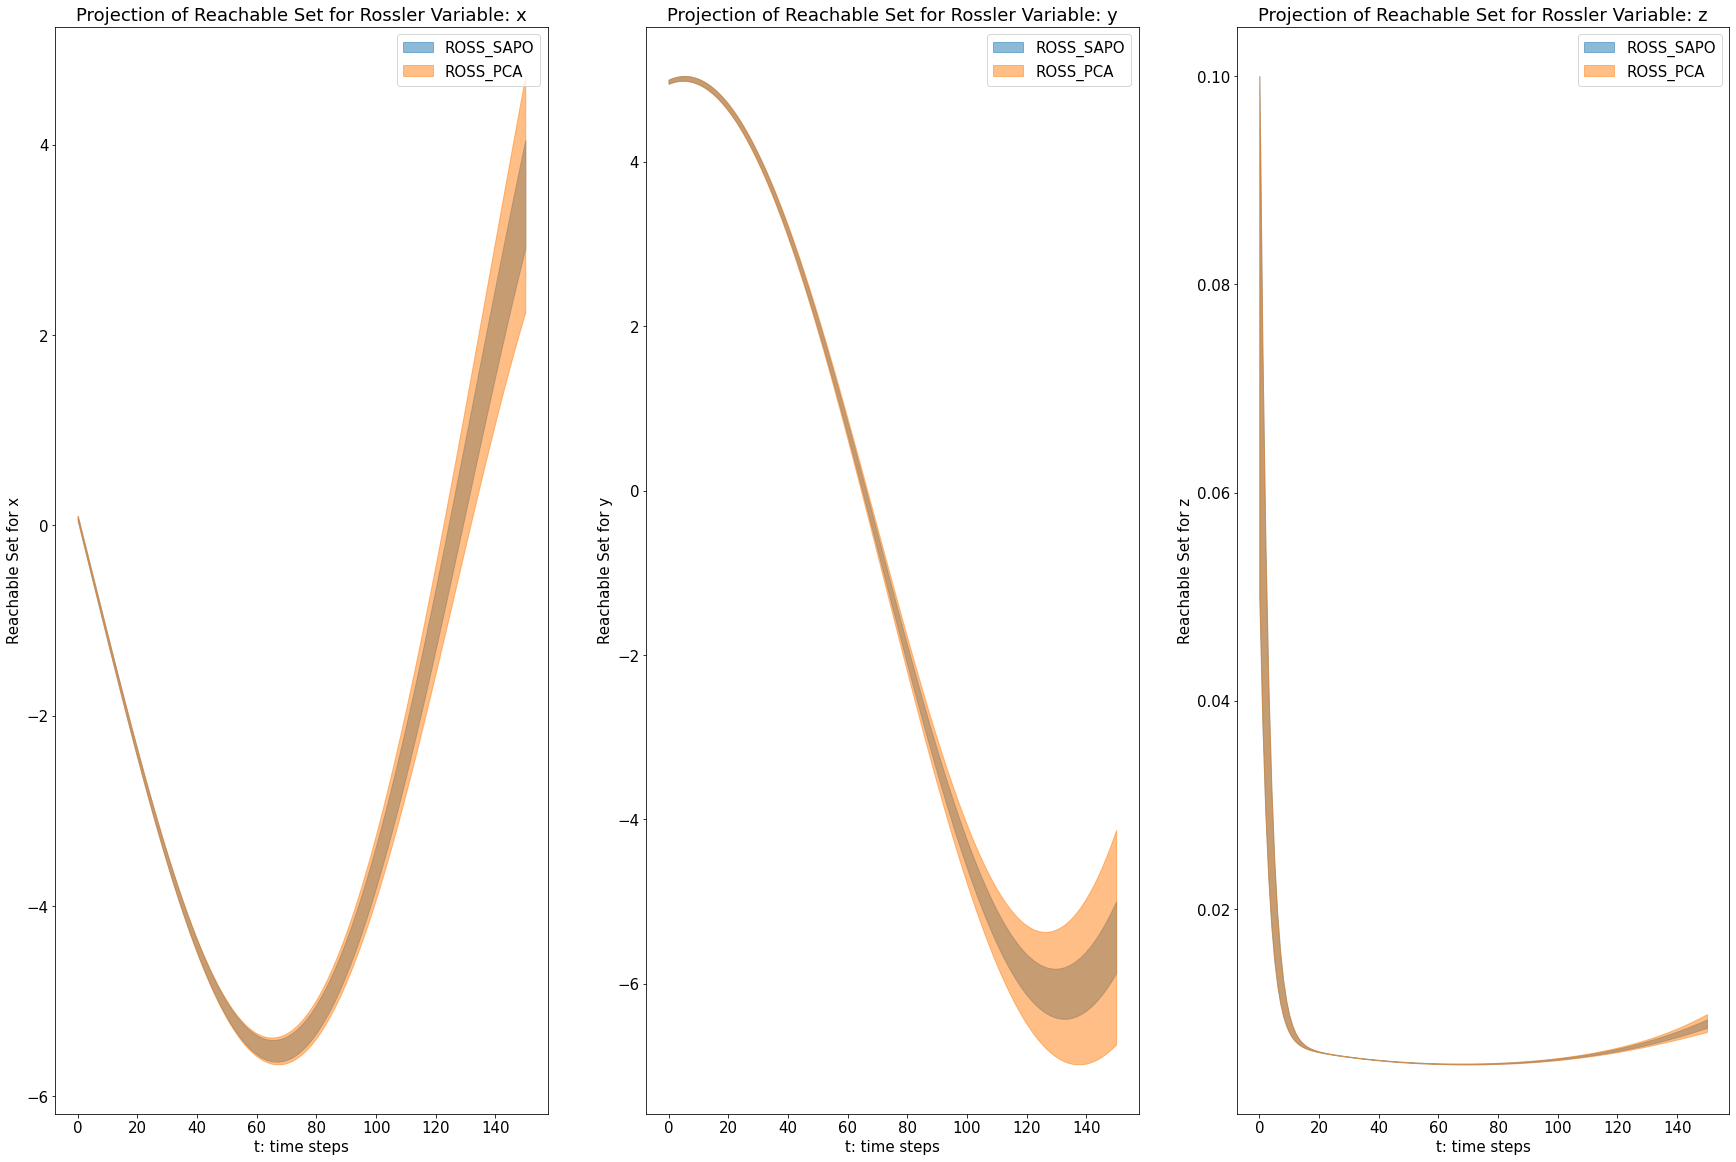

Average Generator Procedure Duration: 0.00255662168775286 sec
Average Functional Composition Duration: 0.011526716777256557 sec
Average Bound Computation Duration: 0.00039121741340273903 sec
Average Reachable Set Computation Duration: 0.13107226106855605 sec
Average Proj Duration: 0.028259336948394775 sec


In [4]:
ROSS_PCA_ITER_STEPS = 10 #Number of steps between each recomputation of PCA Templates.

'PCA Strategy Parameters'
ROSS_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
ROSS_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(ross_unit, traj_steps=ROSS_PCA_TRAJ_STEPS, num_trajs=ROSS_PCA_NUM_TRAJ, iter_steps=ROSS_PCA_ITER_STEPS)
ross_pca_flow = ross_unit_reach.computeReachSet(ROSS_NUM_STEPS, tempstrat=pca_strat)

ross_pca_plot = Plot()
ross_pca_plot.add(ross_flow, "ROSS_SAPO") #Add Sapo's flowpipe first.
ross_pca_plot.add(ross_pca_flow, "ROSS_PCA") #Add our PCA flowipe next.

ross_pca_plot.plot(0,1,2) #Plot projection on all variables.
Timer.generate_stats()


## Rossler Linear Approximation Strategy

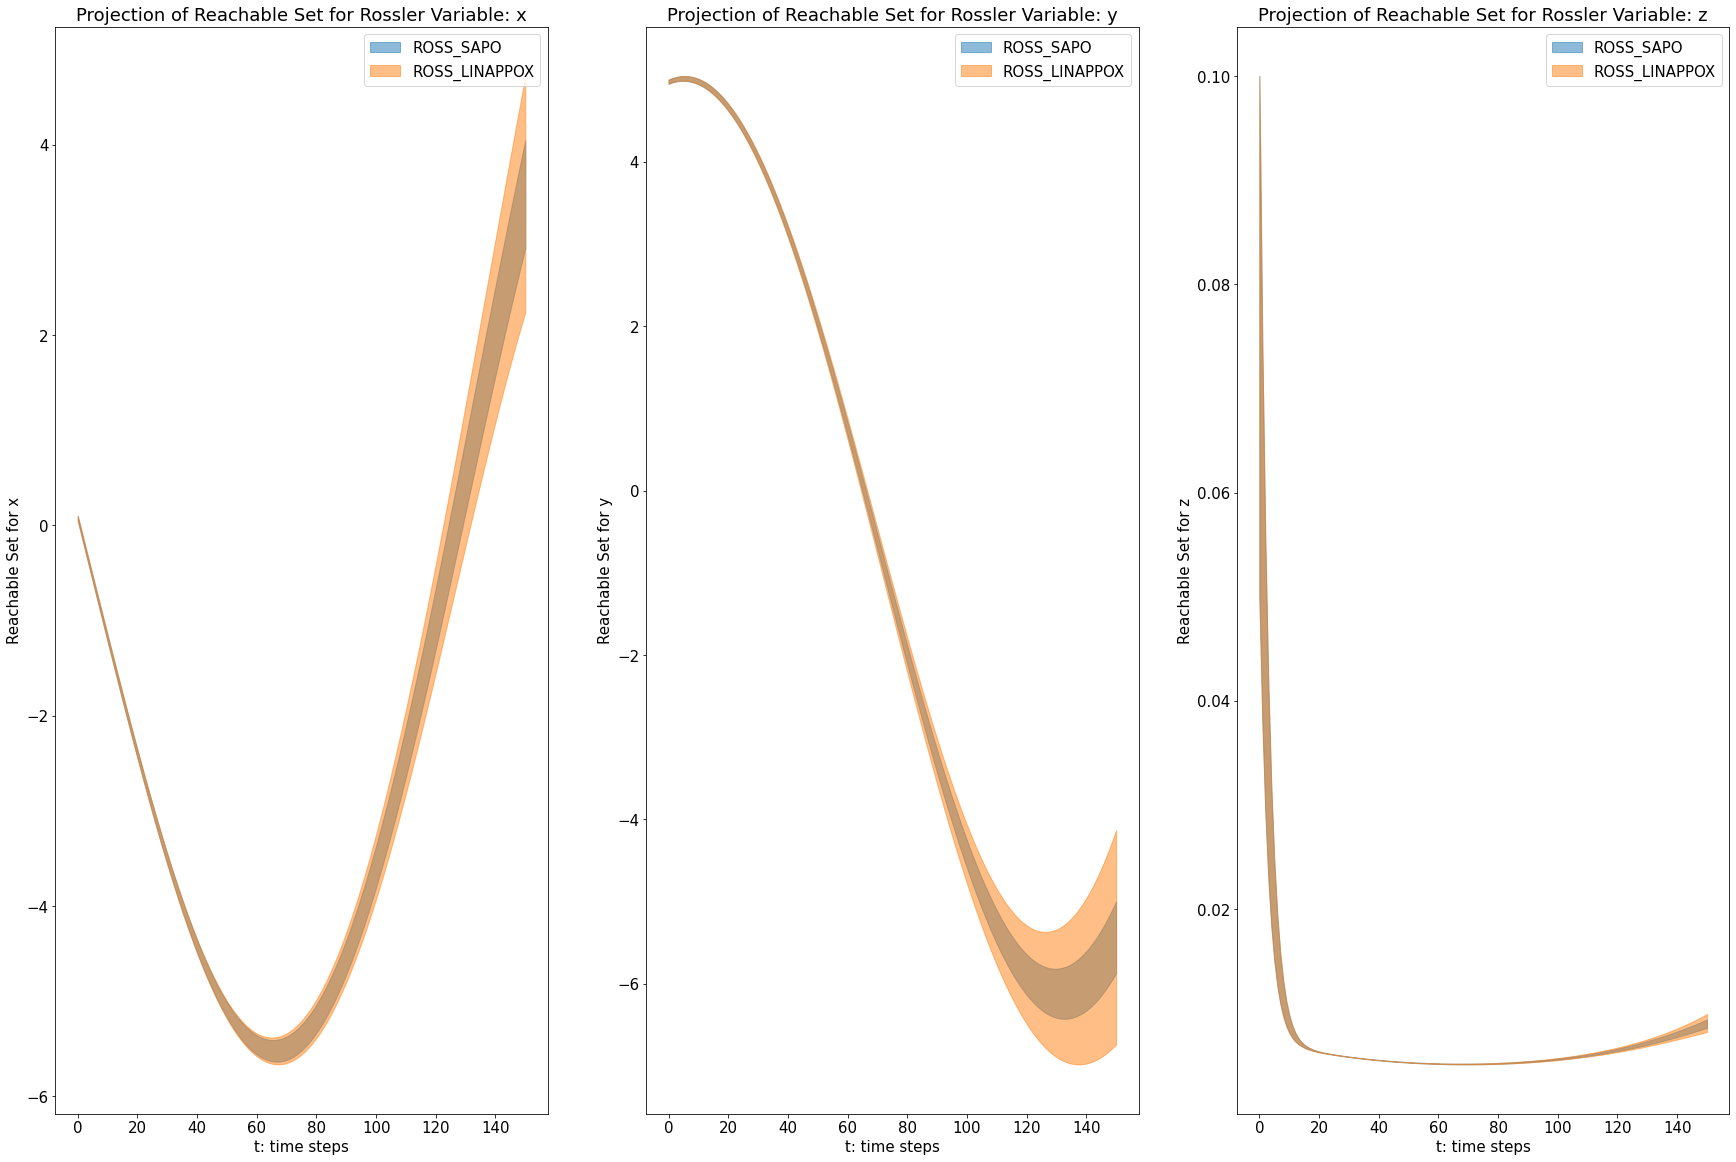

Average Generator Procedure Duration: 0.002647411205150463 sec
Average Functional Composition Duration: 0.011845042440626357 sec
Average Bound Computation Duration: 0.0004195852044187946 sec
Average Reachable Set Computation Duration: 0.18432686487833658 sec
Average Proj Duration: 0.02843903170691596 sec


In [5]:
'Lin Strategy Parameters'
ROSS_LIN_ITER_STEPS = 3 #Number of steps between each recomputation of LinApprox Templates.

lin_strat = LinStrat(ross_unit, iter_steps=ROSS_LIN_ITER_STEPS)
ross_lin_flow = ross_unit_reach.computeReachSet(ROSS_NUM_STEPS, tempstrat=lin_strat) #Run LinApprox Strat

ross_lin_plot = Plot()
ross_lin_plot.add(ross_flow, "ROSS_SAPO") #Add Sapo's flowpipe first.
ross_lin_plot.add(ross_lin_flow, "ROSS_LINAPPOX") #Add our LinApprox flowipe next.

ross_lin_plot.plot(0,1,2)
Timer.generate_stats()


# Lotka-Volterra

We test the PCA and Local Linear Approximation Strategies for the LV models.  

In [2]:
LV_NUM_STEPS = 150 #Number of steps to run the computation.SIR_

lv_unit = LotkaVolterra_UnitBox()
lv = LotkaVolterra()

lv_reach = ReachSet(lv)
lv_unit_reach = ReachSet(lv_unit)

lv_flow = lv_reach.computeReachSet(LV_NUM_STEPS) #Run Sapo Strat.
Timer.generate_stats()

Average Generator Procedure Duration: 0.004305405616760254 sec
Average Functional Composition Duration: 0.04471775425804986 sec
Average Bound Computation Duration: 0.0009487992392645942 sec
Average Reachable Set Computation Duration: 0.30130996386210124 sec


## Lotka-Volterra PCA Approx

Note: Sapo's templatees do not do better than the trivial box templates containing the initial set. See below to confirm this.

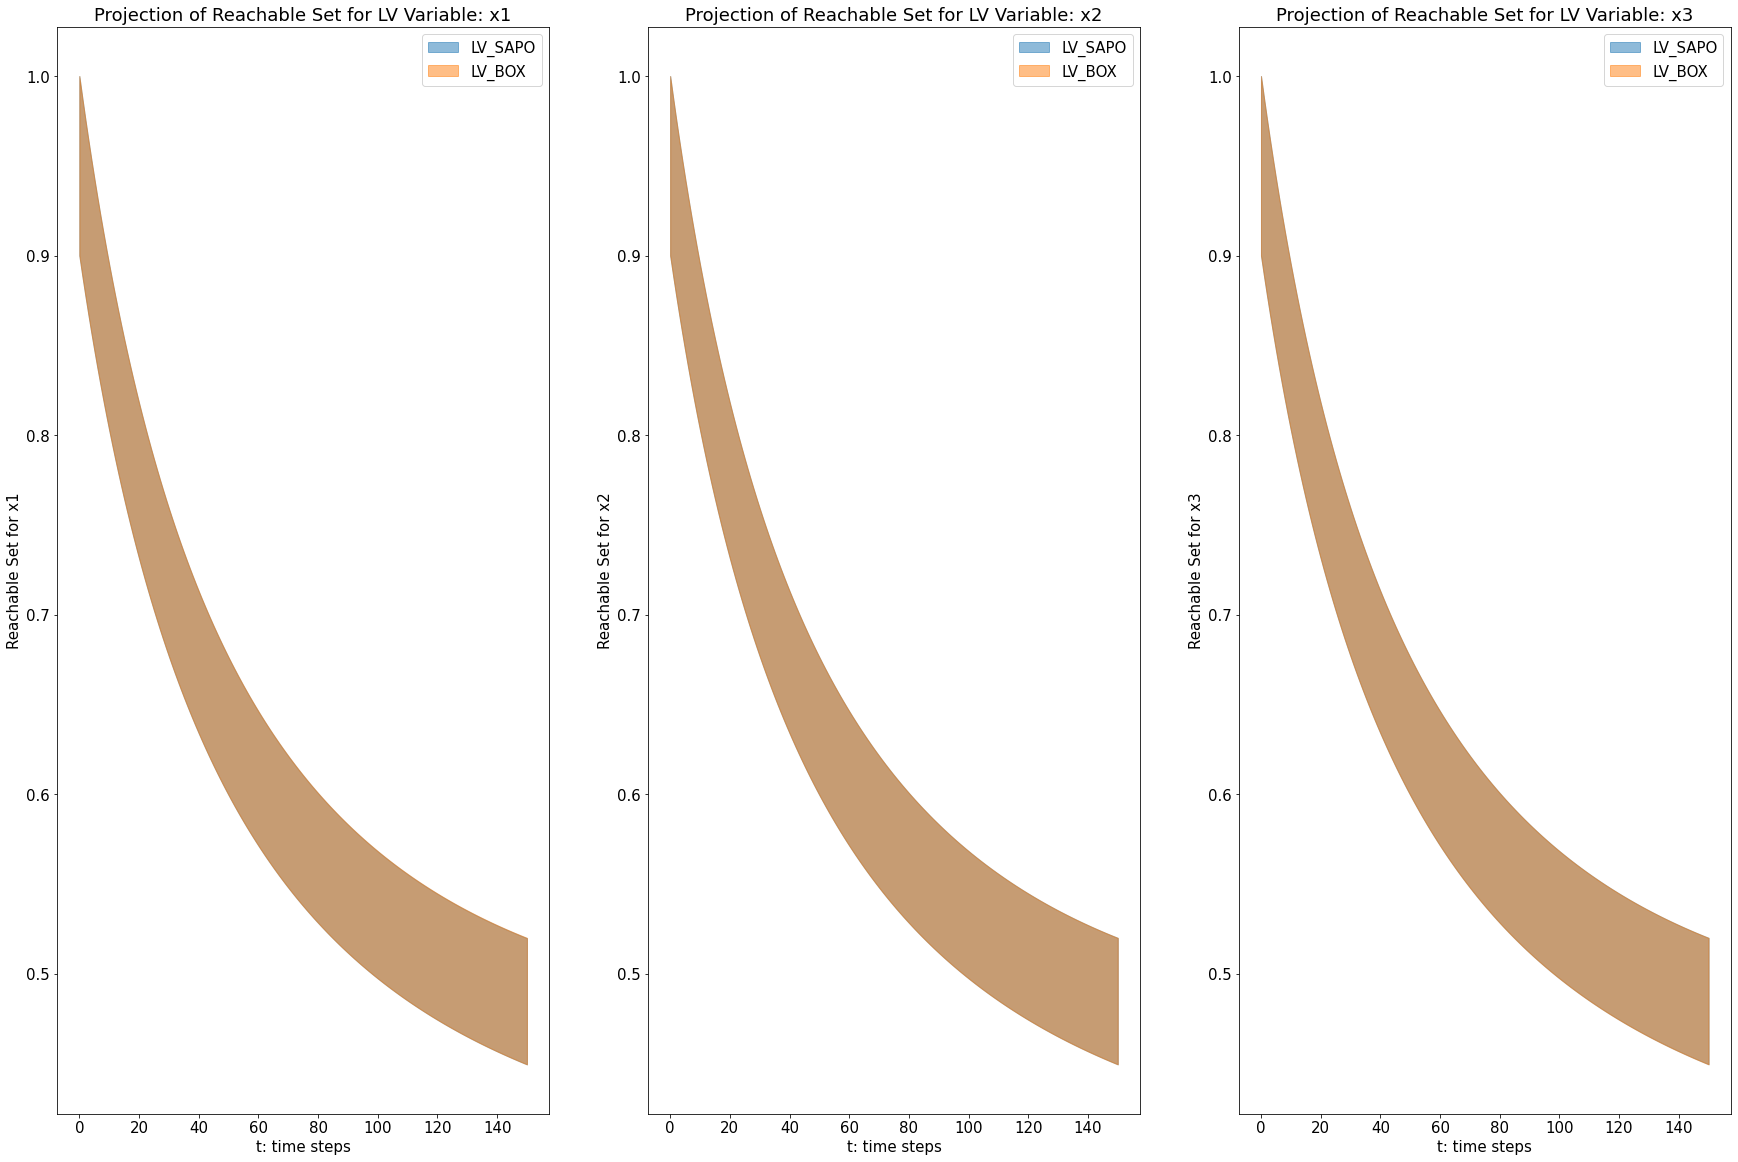

Average Generator Procedure Duration: 0.0041833003362019856 sec
Average Functional Composition Duration: 0.044321235815684 sec
Average Bound Computation Duration: 0.0008327824274698894 sec
Average Reachable Set Computation Duration: 0.19856521368026733 sec
Average Proj Duration: 0.03410184383392334 sec


In [3]:
lv_unit_flow = lv_unit_reach.computeReachSet(LV_NUM_STEPS)
lv_unit_plot = Plot()

lv_unit_plot.add(lv_flow, "LV_SAPO") #Add Sapo's flowpipe first.
lv_unit_plot.add(lv_unit_flow, "LV_BOX") #Add our Unit flowipe next.

lv_unit_plot.plot(0,1,2)
Timer.generate_stats()

Here is our PCA strategy in action:

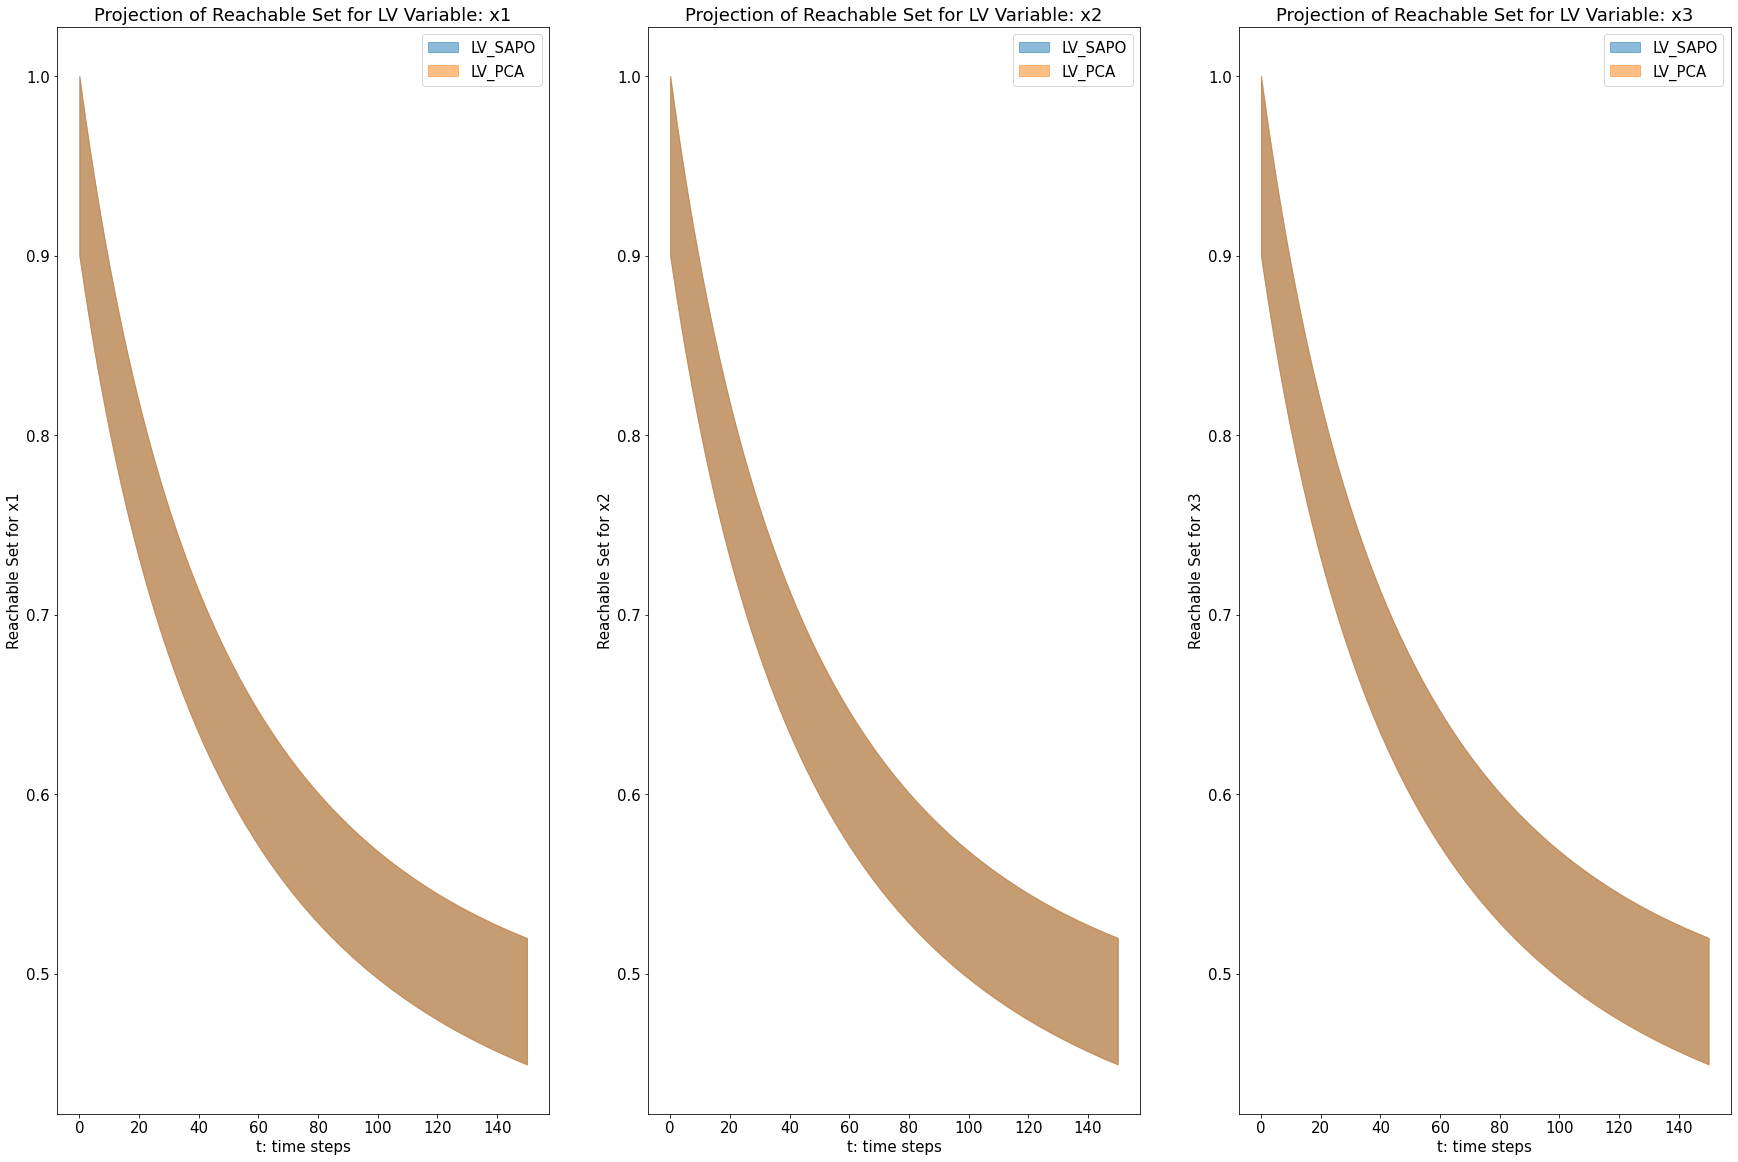

Average Generator Procedure Duration: 0.005863323741488987 sec
Average Functional Composition Duration: 0.05212115420235528 sec
Average Bound Computation Duration: 0.0016136790381537543 sec
Average Reachable Set Computation Duration: 0.3819805113474528 sec
Average Proj Duration: 0.05584448575973511 sec


In [4]:
LV_PCA_ITER_STEPS = 10 #Number of steps between each recomputation of PCA Templates.

'PCA Strategy Parameters'
LV_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
LV_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(lv_unit, traj_steps=LV_PCA_TRAJ_STEPS, num_trajs=LV_PCA_NUM_TRAJ, iter_steps=LV_PCA_ITER_STEPS)
lv_pca_flow = lv_unit_reach.computeReachSet(LV_NUM_STEPS, tempstrat=pca_strat)
lv_pca_plot = Plot()
lv_pca_plot.add(lv_flow, "LV_SAPO") #Add Sapo's flowpipe first.
lv_pca_plot.add(lv_pca_flow, "LV_PCA") #Add our PCA flowipe next.

lv_pca_plot.plot(0,1,2) #Plot projection on all variables.
Timer.generate_stats()


## Lotka-Volterra Linear Approximation Strategy

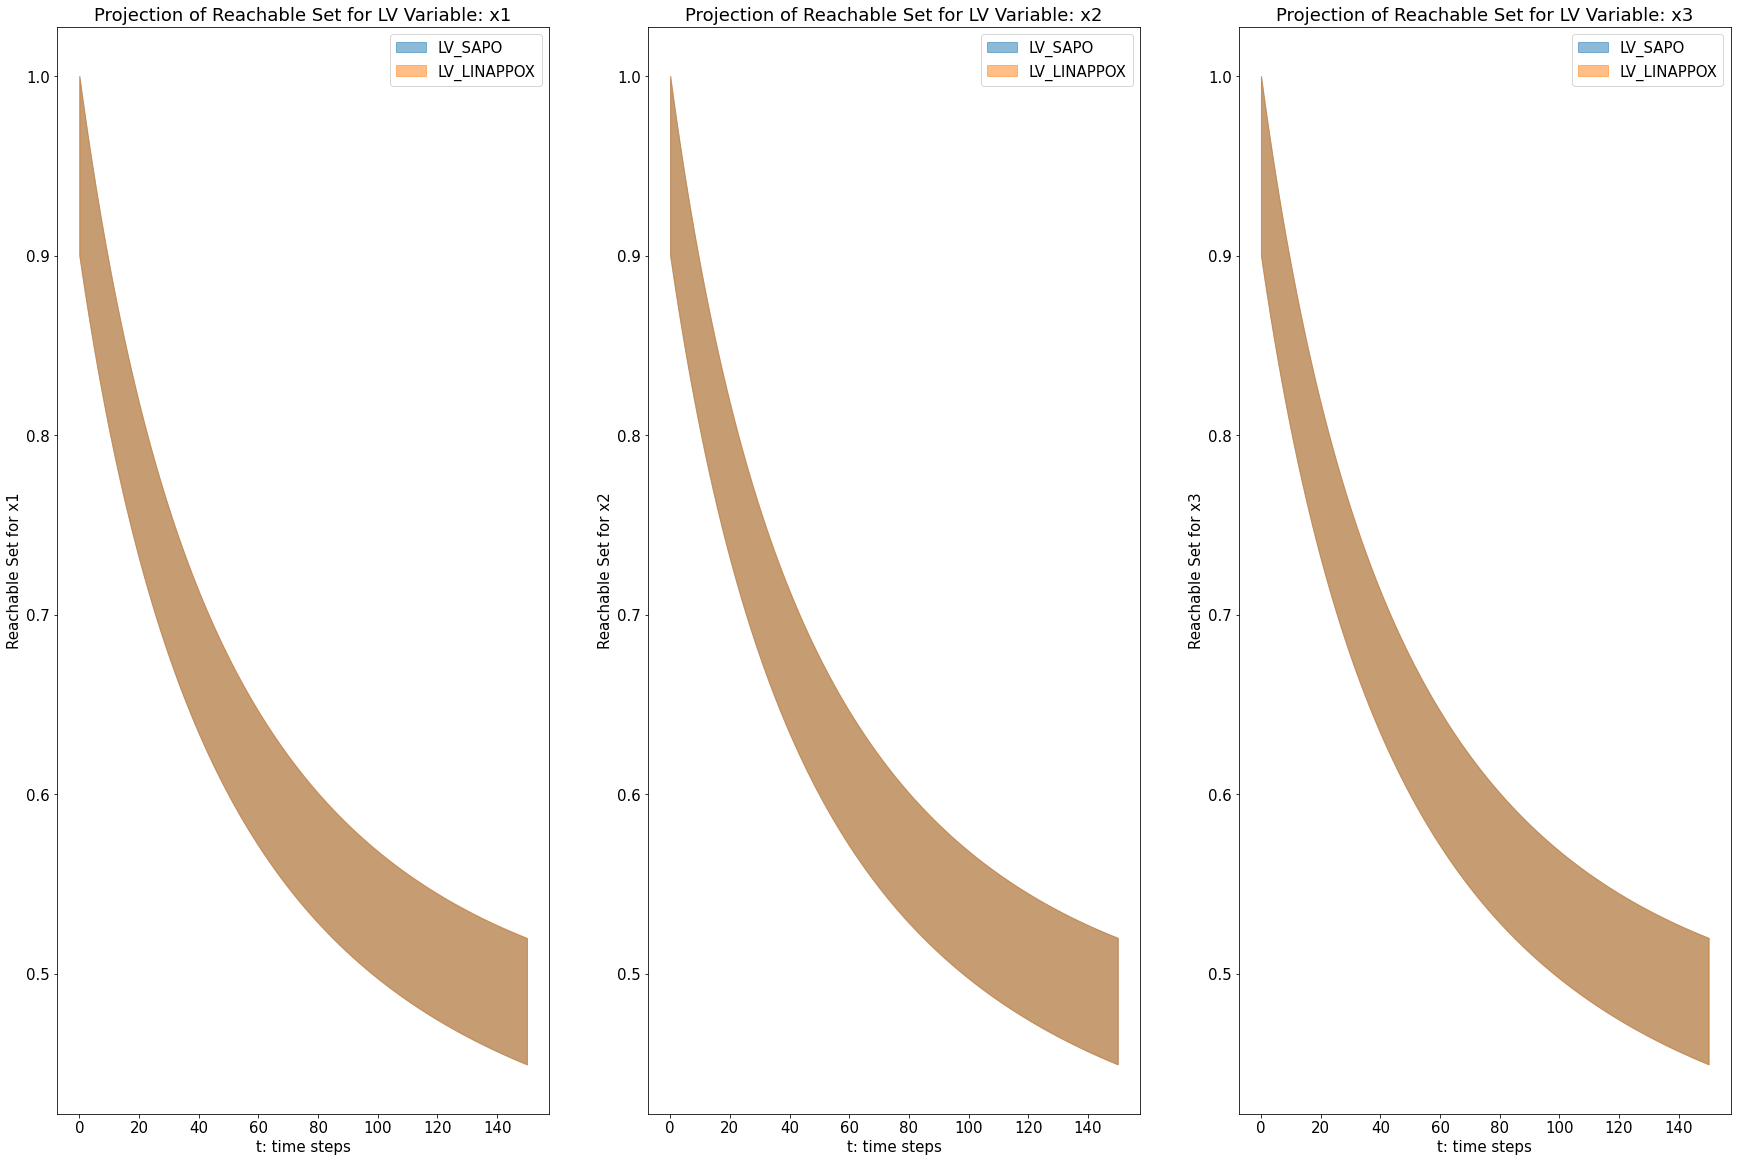

Average Generator Procedure Duration: 0.006262024442354838 sec
Average Functional Composition Duration: 0.05283908704916636 sec
Average Bound Computation Duration: 0.0018635080258051554 sec
Average Reachable Set Computation Duration: 0.43653995235761006 sec
Average Proj Duration: 0.05448710918426514 sec


In [5]:
'Lin Strategy Parameters'
LV_LIN_ITER_STEPS = 3 #Number of steps between each recomputation of LinApprox Templates.

lin_strat = LinStrat(lv_unit, iter_steps=LV_LIN_ITER_STEPS)
lv_lin_flow = lv_unit_reach.computeReachSet(LV_NUM_STEPS, tempstrat=lin_strat) #Run LinApprox Strat

lv_lin_plot = Plot()
lv_lin_plot.add(lv_flow, "LV_SAPO") #Add Sapo's flowpipe first.
lv_lin_plot.add(lv_lin_flow, "LV_LINAPPOX") #Add our LinApprox flowipe next.

lv_lin_plot.plot(0,1,2)
Timer.generate_stats()


# Phosphorelay

We test the PCA and Local Linear Approximation Strategies for the Phosphorelay models.  

In [2]:
PHOS_NUM_STEPS = 150 #Number of steps to run the computation.SIR_

phos_unit = Phosphorelay_UnitBox()
phos = Phosphorelay()

phos_reach = ReachSet(phos)
phos_unit_reach = ReachSet(phos_unit)

phos_flow = phos_reach.computeReachSet(PHOS_NUM_STEPS) #Run Sapo Strat.
Timer.generate_stats()

Average Generator Procedure Duration: 0.0047125383218129474 sec
Average Functional Composition Duration: 0.04134156703948975 sec
Average Bound Computation Duration: 0.00045620810417901903 sec
Average Reachable Set Computation Duration: 0.29678165912628174 sec


## Phosphorelay PCA

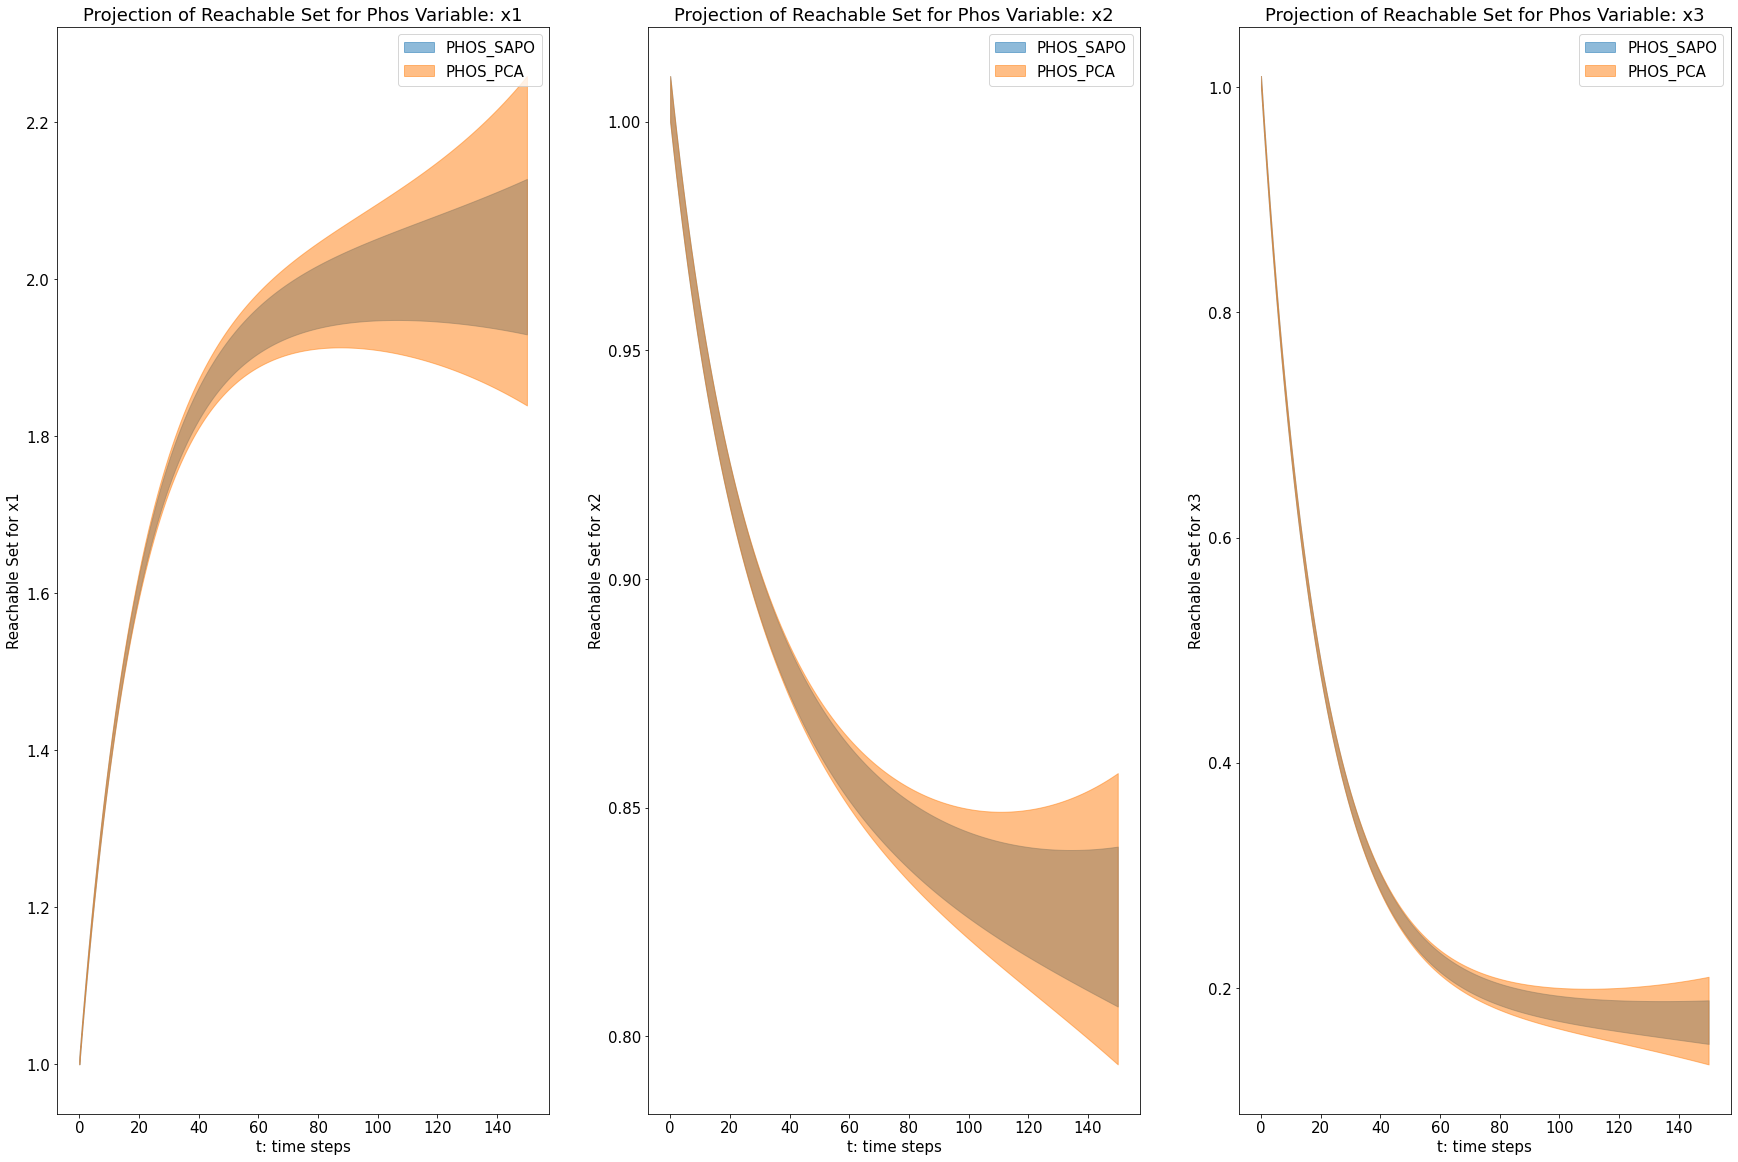

Average Generator Procedure Duration: 0.008044253455268012 sec
Average Functional Composition Duration: 0.045906058152516686 sec
Average Bound Computation Duration: 0.0011594124067397344 sec
Average Reachable Set Computation Duration: 0.4585248605410258 sec
Average Proj Duration: 0.08385761578877766 sec


In [3]:
PHOS_PCA_ITER_STEPS = 20 #Number of steps between each recomputation of PCA Templates.

'PCA Strategy Parameters'
PHOS_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
PHOS_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(phos_unit, traj_steps=PHOS_PCA_TRAJ_STEPS, num_trajs=PHOS_PCA_NUM_TRAJ, iter_steps=PHOS_PCA_ITER_STEPS)
phos_pca_flow = phos_unit_reach.computeReachSet(PHOS_NUM_STEPS, tempstrat=pca_strat)
phos_pca_plot = Plot()
phos_pca_plot.add(phos_flow, "PHOS_SAPO") #Add Sapo's flowpipe first.
phos_pca_plot.add(phos_pca_flow, "PHOS_PCA") #Add our PCA flowipe next.

phos_pca_plot.plot(0,1,2) #Plot projection on all variables.
Timer.generate_stats()

## Phosphorelay Linear Approximation Strategy

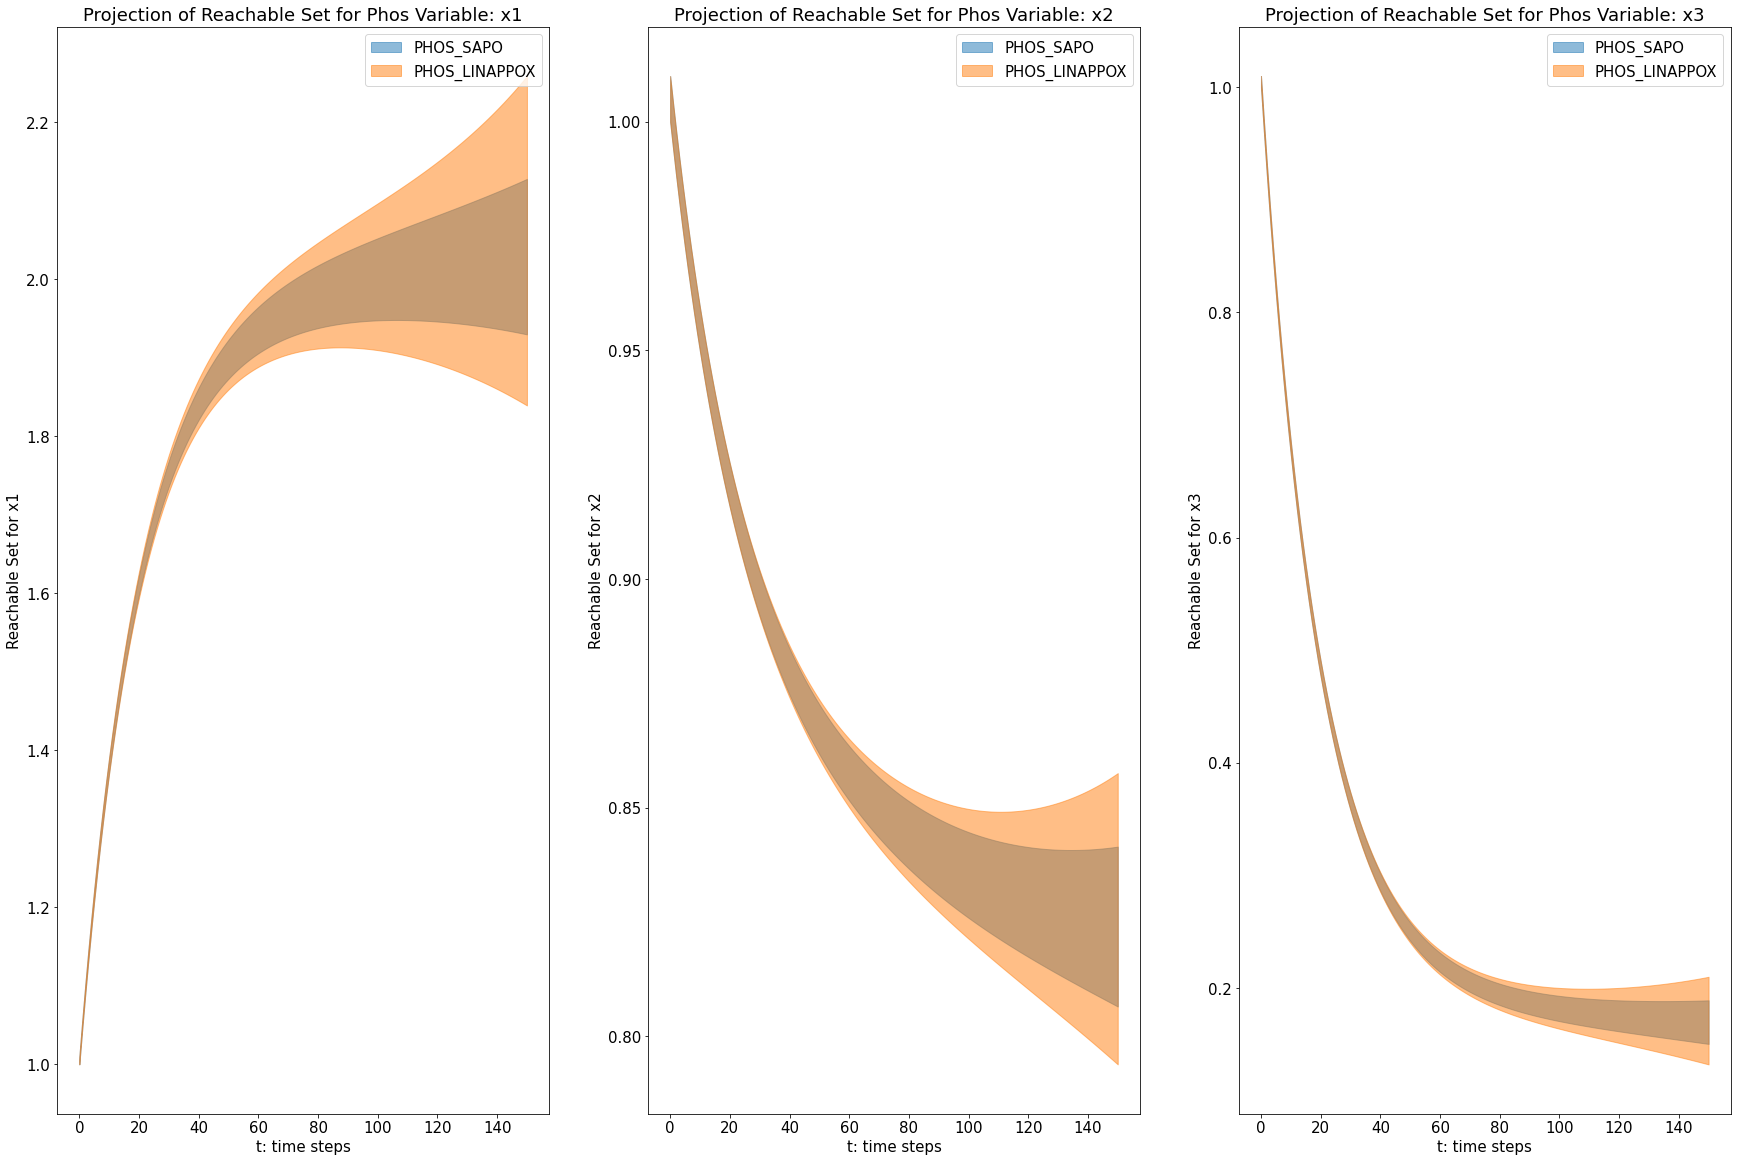

Average Generator Procedure Duration: 0.010259593923886617 sec
Average Functional Composition Duration: 0.05035362422466278 sec
Average Bound Computation Duration: 0.001603534846078782 sec
Average Reachable Set Computation Duration: 0.601312108569675 sec
Average Proj Duration: 0.08315140008926392 sec


In [4]:
'Lin Strategy Parameters'
PHOS_LIN_ITER_STEPS = 3 #Number of steps between each recomputation of LinApprox Templates.

lin_strat = LinStrat(phos_unit, iter_steps=PHOS_LIN_ITER_STEPS)
phos_lin_flow = phos_unit_reach.computeReachSet(PHOS_NUM_STEPS, tempstrat=lin_strat) #Run LinApprox Strat

phos_lin_plot = Plot()
phos_lin_plot.add(phos_flow, "PHOS_SAPO") #Add Sapo's flowpipe first.
phos_lin_plot.add(phos_lin_flow, "PHOS_LINAPPOX") #Add our LinApprox flowipe next.

phos_lin_plot.plot(0,1,2)
Timer.generate_stats()


# Oscillating Particle

In [3]:
OP_NUM_STEPS = 80 #Number of steps to run the computation.SIR_

op = OscPart()

op_reach = ReachSet(op)
op_flow = op_reach.computeReachSet(OP_NUM_STEPS) #Run Sapo Strat.

Timer.generate_stats()

Average Generator Procedure Duration: 0.0019278228282928467 sec
Average Functional Composition Duration: 0.007501906156539917 sec
Average Bound Computation Duration: 0.0001913537581761678 sec
Average Reachable Set Computation Duration: 0.02238466739654541 sec


## Oscillating Particle PCA

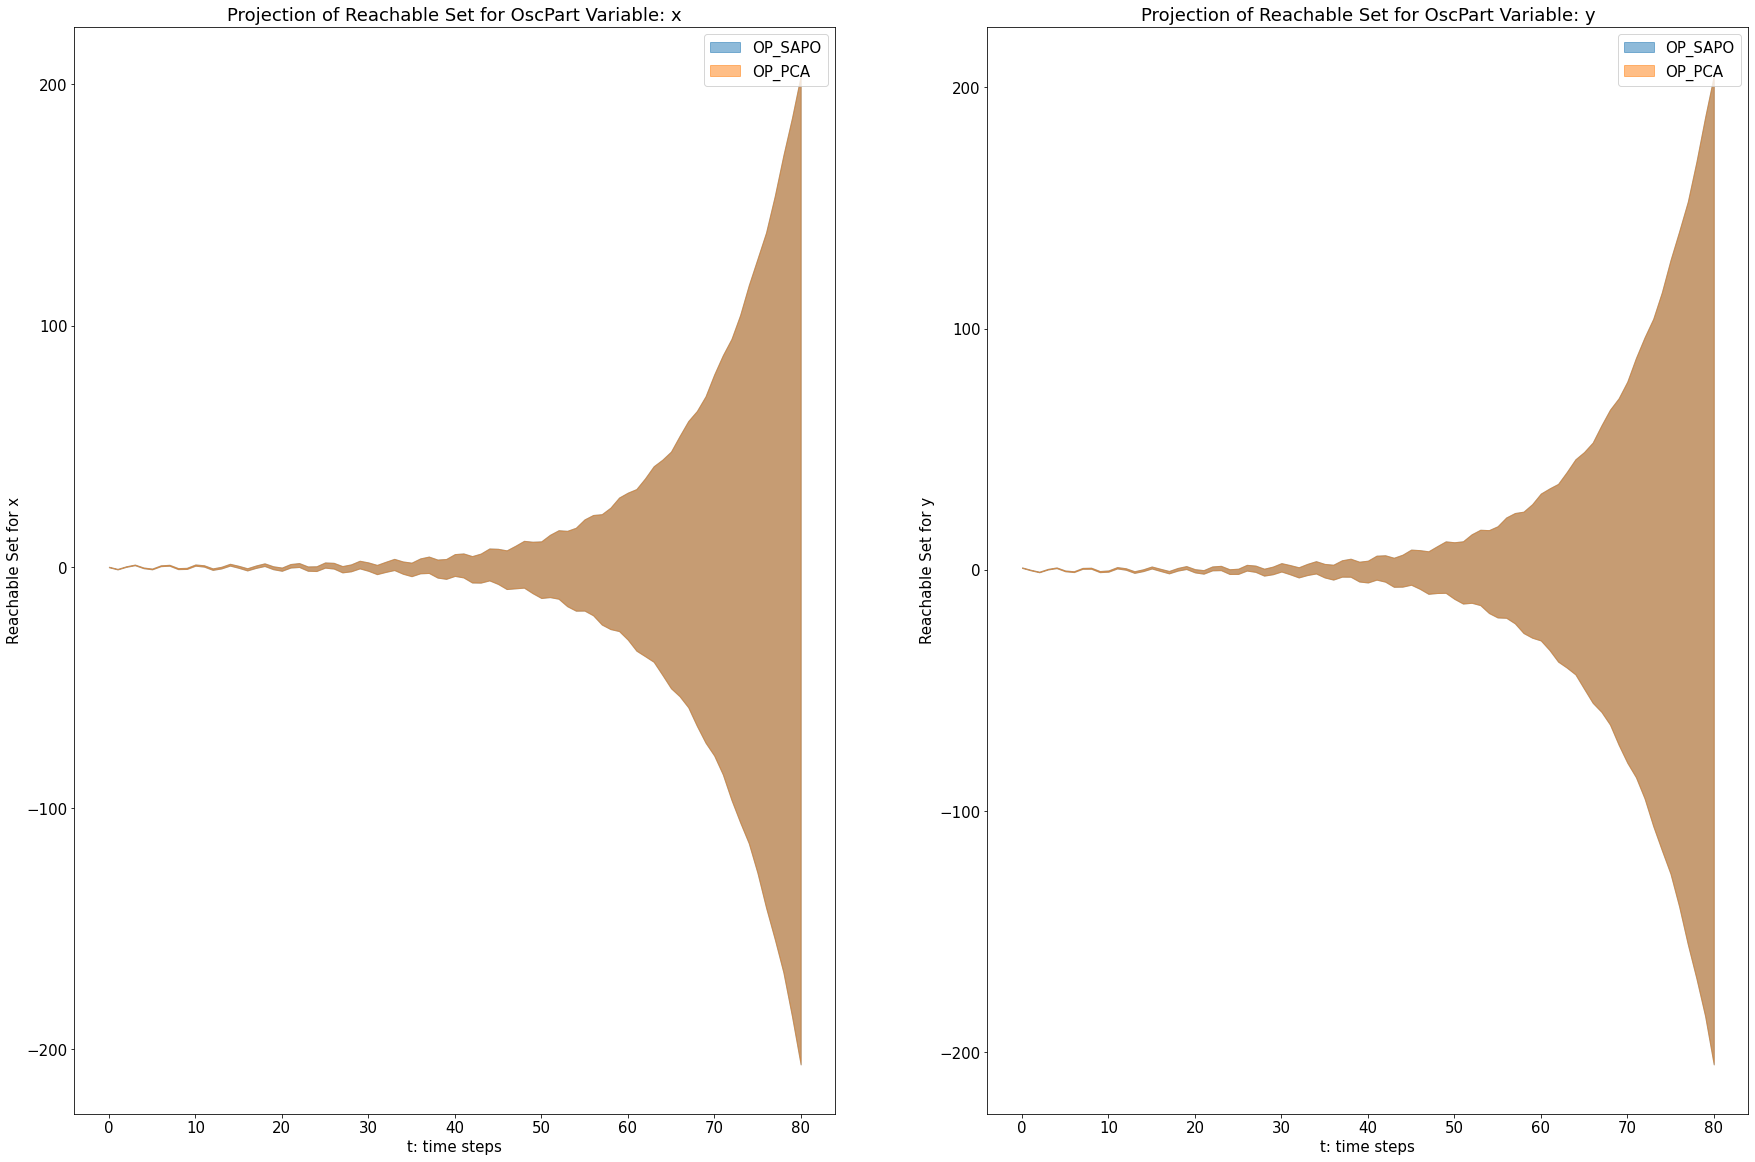

Average Generator Procedure Duration: 0.003334207534790039 sec
Average Functional Composition Duration: 0.012158932685852051 sec
Average Bound Computation Duration: 0.0002817229429880778 sec
Average Reachable Set Computation Duration: 0.5744149694840114 sec
Average Proj Duration: 0.022941678762435913 sec


In [5]:
## Phosphorelay PCA

OP_PCA_ITER_STEPS = 2 #Number of steps between each recomputation of PCA Templates.

'PCA Strategy Parameters'
OP_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
OP_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(op, traj_steps=OP_PCA_TRAJ_STEPS, num_trajs=OP_PCA_NUM_TRAJ, iter_steps=OP_PCA_ITER_STEPS)
op_pca_flow = op_reach.computeReachSet(OP_NUM_STEPS, tempstrat=pca_strat)
op_pca_plot = Plot()
op_pca_plot.add(op_flow, "OP_SAPO") #Add Sapo's flowpipe first.
op_pca_plot.add(op_pca_flow, "OP_PCA") #Add our PCA flowipe next.

op_pca_plot.plot(0,1) #Plot projection on all variables.
Timer.generate_stats()

## Oscillating Particle Linear Approximation Strategy

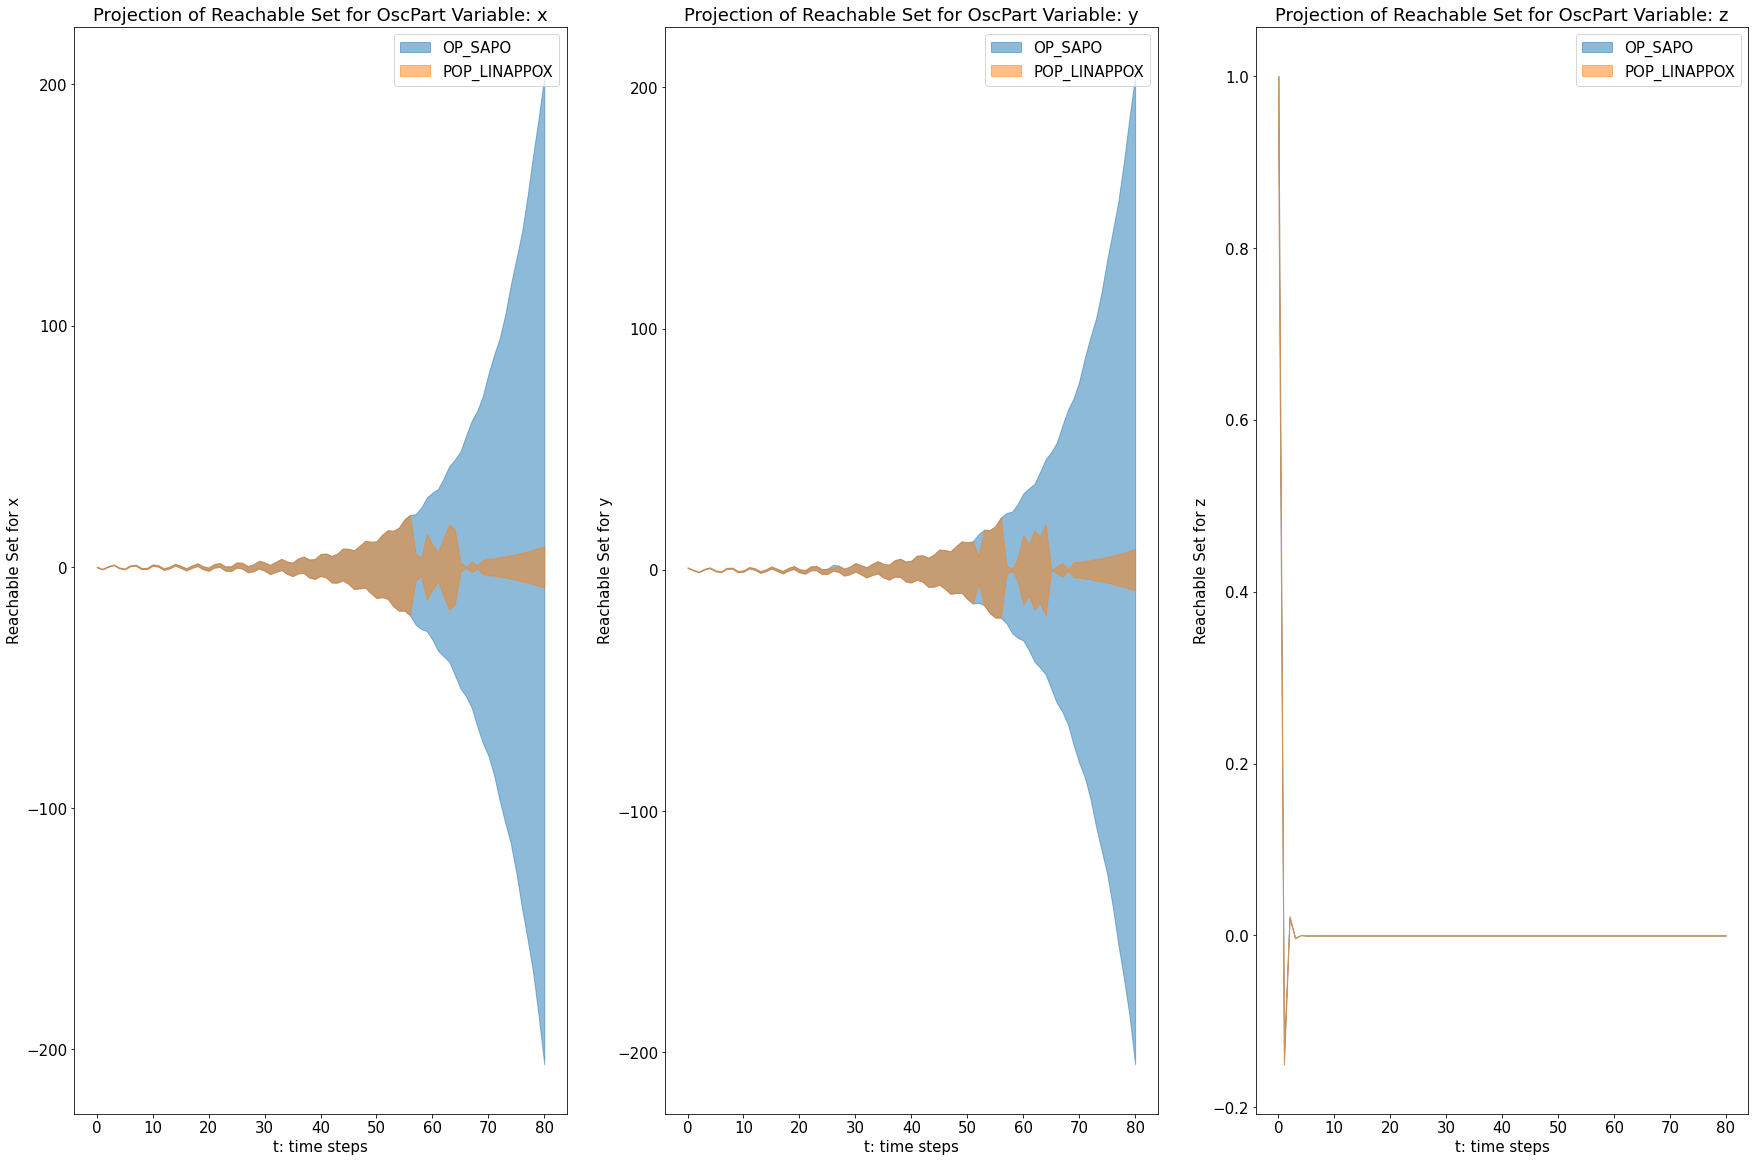

Average Generator Procedure Duration: 0.0037317327090672084 sec
Average Functional Composition Duration: 0.013024459140641348 sec
Average Bound Computation Duration: 0.0003062505097616286 sec
Average Reachable Set Computation Duration: 0.7436164818704128 sec
Average Proj Duration: 0.023125733648027693 sec


In [6]:
'Lin Strategy Parameters'
OP_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of LinApprox Templates.

lin_strat = LinStrat(op, iter_steps=OP_LIN_ITER_STEPS)
op_lin_flow = op_reach.computeReachSet(OP_NUM_STEPS, tempstrat=lin_strat) #Run LinApprox Strat

op_lin_plot = Plot()
op_lin_plot.add(op_flow, "OP_SAPO") #Add Sapo's flowpipe first.
op_lin_plot.add(op_lin_flow, "POP_LINAPPOX") #Add our LinApprox flowipe next.

op_lin_plot.plot(0,1,2)
Timer.generate_stats()
